# Deep Autoencoder com a base de dados CIFAR10



In [5]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Input, Dense

%matplotlib inline

In [6]:
(prev_train, _), (prev_test, _) = cifar10.load_data()
prev_train.shape

prev_train = prev_train.astype("float32") / 255
prev_test = prev_test.astype("float32") / 255

### Usando o reshape para modificar a estrutura da base de dados

In [7]:
prev_train = prev_train.reshape((len(prev_train), np.prod(prev_train.shape[1:])))
prev_train.shape
prev_train.dtype

dtype('float32')

In [8]:
prev_test = prev_test.reshape((len(prev_test), np.prod(prev_test.shape[1:])))
prev_test.shape

(10000, 3072)

# Criando o modelo Deep Autoencoder

### vamos codificar os dados na sequencia

3072 --> 1536 --> 768 --> 384 --> 192 --> 384 --> 768 --> 1536 --> 3072
    

In [9]:
autoencoder = Sequential()

## Criando o Encoder e o Decode

In [10]:
# Encode
autoencoder.add(Dense(units = 1536, activation = "relu", input_dim = 3072))
autoencoder.add(Dense(units = 768, activation = "relu"))

# Decode
autoencoder.add(Dense(units = 1536, activation = "relu"))
autoencoder.add(Dense(units = 3072, activation = "sigmoid"))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1536)              4720128   
_________________________________________________________________
dense_1 (Dense)              (None, 768)               1180416   
_________________________________________________________________
dense_2 (Dense)              (None, 1536)              1181184   
_________________________________________________________________
dense_3 (Dense)              (None, 3072)              4721664   
Total params: 11,803,392
Trainable params: 11,803,392
Non-trainable params: 0
_________________________________________________________________


## Compilando o modelo

In [11]:
autoencoder.compile(optimizer = "adam",
                   loss = "binary_crossentropy",
                   metrics = ["MeanAbsoluteError"])


## Treinamento do Deep Autoencoder

In [ ]:
autoencoder.fit(prev_train,prev_train,
               epochs = 500, batch_size = 256,
               validation_data = (prev_test, prev_test))

# Criando o Codificador

In [13]:
dimensao_original = Input(shape = (3072, ))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]

encoder = Model(dimensao_original,
               camada_encoder2(camada_encoder1(dimensao_original)))
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 1536)              4720128   
_________________________________________________________________
dense_1 (Dense)              (None, 768)               1180416   
Total params: 5,900,544
Trainable params: 5,900,544
Non-trainable params: 0
_________________________________________________________________


### Aplicando o encoder nas imagens de testes

In [14]:
imagens_codificadas = encoder.predict(prev_test)

In [15]:
imagens_codificadas.shape

(10000, 768)

In [16]:
imagens_decodificadas = autoencoder.predict(prev_test)

In [17]:
imagens_decodificadas.shape

(10000, 3072)

# Visualizando as imagens

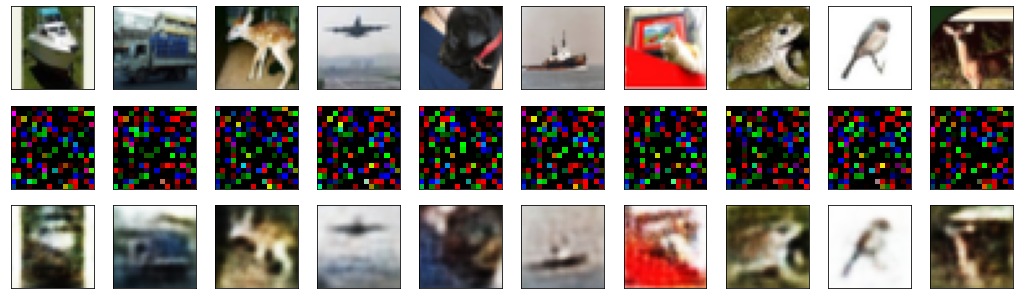

In [18]:
num_imagens = 10

# Selecionando 10 imagens aleatórias da base de dados de teste
imagens_test = np.random.randint(prev_test.shape[0], size = num_imagens)

# Plotando as imagens
plt.figure(figsize = (18, 18))

for i, indice_img in enumerate(imagens_test):
    
    # Gráfico 01, plotar a imagem Original
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(prev_test[indice_img].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())
    
     # Gráfico 02, plotar a imagem codificada
    eixo = plt.subplot(10, 10, i + 1 + num_imagens)
    plt.imshow((imagens_codificadas[indice_img].reshape(16, 16, 3) * 255).astype(np.uint8))
    plt.xticks(())
    plt.yticks(())
    
    # Gráfico 03, plotar a imagem Decodificada
    eixo = plt.subplot(10, 10, i + 1 + num_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_img].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())
  
plt.show()